In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from tqdm import tqdm
from random import seed,shuffle
from random import randrange,randint,sample
from csv import reader
from math import sqrt,isclose
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

**Function definitions**

In [4]:
#-----------------------------variable definitions-------------------------------------#
# x or X = boston data
# y or Y = target
# k = random batch size
# w or W = weight
# b = bias/intercept
# r = learning rate
# n or N = number of rows or data in boston housing price dataset which is 506
#----------------------SGD function--------------------------------------------#
def custom_SGD(x,y,k,w,learning_rate,b,rows,cols,max_iter):
    iteration = 0
    der_w = 0
    der_b = 0
    for i in range(max_iter):
        #print(learning_rate)
        Wnew,bnew,lr = random_batch(x,y,k,w,learning_rate,b,rows,cols,der_w,der_b)
        if np.allclose([w],[Wnew]):
            break
        w = Wnew
        b = bnew
        lr = lr/2
    iteration += 1
    return w,b
#---------------------------------function to pick random batches of size k such that each batch has different elements----------#       
def random_batch(x,y,k,w,learning_rate,b,rows,cols,der_w,der_b):
    r = list(range(0,rows)) #list of 506 numbers from where we will pick k random numbers
    while len(r) != 0:
        if len(r) < k:
            break
        else:
            z = sample(r,k)
            new_x = np.zeros((k,cols))
            new_y = np.zeros((k,1))# picking up k random numbers from list of 506 numbers which then will act as index to sample out batches in new_x and new_y
        #print(z)
        count = 0
        for i in z:
            new_x[count] = x[i] #creating new matrix/vector with randomly picked up indexes
            new_y[count] = y[i]
            count = count+1
        #print(new_x)
        #print(new_x.shape)
        #print(new_y)
        #print(new_y.shape)
        Wnew,bnew = cal_gradient(new_x,new_y,w,b,learning_rate,k,der_w,der_b)
        learning_rate = learning_rate/2
        w = Wnew
        b = bnew
        r = list(i for i in r if i not in z)
    return w,b,learning_rate
#---------------------function to calculate gradient------------------------------------------#
def cal_gradient(X,Y,w,b,r,k,der_w,der_b):
    #print(X.shape)
    x = np.asmatrix(X)
    #print(x.shape)
    y = np.asmatrix(Y)
    #print(y[:,0].shape)
    for i in range(len(x)):
        der_w += np.dot(-2*(x[i]).T , (y[i] - np.dot(x[i] , w) + b))
        der_b += -2*(y[i] - (np.dot(x[i] , w) + b))
    Wnew = w - (r*der_w)/k
    bnew = b - (r*der_b)/k
    return Wnew,bnew
#---------------------------function to calculate mean squared error------------------------------#
def cal_MSE(x,y,opt_w,opt_b):
    yhat = 0
    Ypred = []
    msq = 0
    reg_line = []
    x = np.asmatrix(x)
    y = np.asmatrix(y)
    for i in range(len(x)):
        yhat = (np.dot(x[i],opt_w) + opt_b)
        reg_line.append(yhat)
        msq += ((Y[i] - yhat)**2)
        Ypred.append(np.dot(x[i],opt_w) + opt_b)
    return msq/len(x),Ypred


**Load Boston dataset**

In [14]:
Xdata = load_boston().data
Ytar = load_boston().target

**Column Standardization on X**

In [15]:
X = Xdata
Y = Ytar 
#print(X[0:5])
#print(Y[0:5])
X = (X-X.mean(axis=0))/X.std(axis=0)
#print(X[0:5])
#print(Y[0:5])

**Data initialization**

In [16]:
W = np.zeros((13,1))#initalizing weights
b = 0 #initializing bias/intercept
learning_rate = 0.001 #initializing learning rate
rows = len(X) 
cols = 13
k = 10 #batch size
iterations = 1000 #iterations

**Finding optimal weights and optimal bias by running Customised SGD algorithm**

In [17]:
optimal_weights,optimal_bias = custom_SGD(X,Y,k,W,learning_rate,b,rows,cols,iterations)
print("Optimal Weights")
print(optimal_weights)
print("Optimal Bias")
print(optimal_bias)

Optimal Weights
[[-0.45736676]
 [-0.34062287]
 [-0.35091316]
 [ 0.32415813]
 [-0.96495186]
 [ 3.03716798]
 [-0.41842106]
 [-1.61325363]
 [ 0.97495503]
 [-0.41331528]
 [-1.45417113]
 [ 0.51679218]
 [-3.20963907]]
Optimal Bias
[[22.08515687]]


**Finding mean squared error between points predicted by our SGD algorithm and actual points**

In [18]:
msq,Ypred = cal_MSE(X,Y,optimal_weights,optimal_bias)
print("Mean squared error: %f" % msq)


Mean squared error: 25.291147


**Scatter plot showing point distribution**

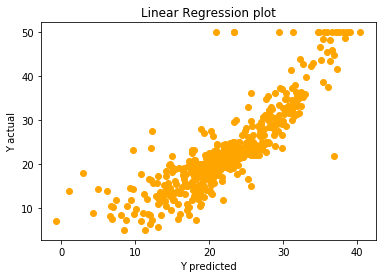

In [19]:
plt.scatter(Ypred,Y,color='orange')
plt.xlabel("Y predicted")
plt.ylabel("Y actual")
plt.title("Linear Regression plot")
plt.show()

**Finding MSE and plotting points after predicting results by using sklearn SGD function**

In [20]:
scaler = preprocessing.StandardScaler().fit(X)
X= scaler.transform(X)

In [21]:
clf = SGDRegressor()
clf.fit(X,Y)
print(mean_squared_error(Y, clf.predict(X)))

22.775945059767555


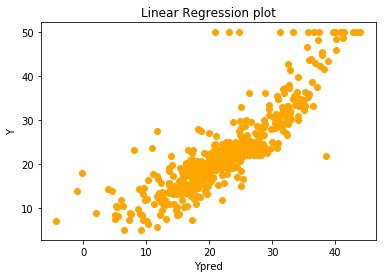

In [22]:
plt.scatter(clf.predict(X),Y,color='orange')
plt.xlabel("Ypred")
plt.ylabel("Y")
plt.title("Linear Regression plot")
plt.show()

**Observations**<br>By taking initial learning rate as 0.001 and max iterations as 1000 we could get the mean squared error value as 28.81 approx which is not very different from MSE value that we would get by using sklearn SGD algorithm.<br>Hence, we can conclude that our custom made SGD algorithm can successfully predict the housing price in city of boston based on the features in the dataset. Even the plot density is high along the same slope.

**Key points**<br>In order to design our own algorithm we need to keep in mind the below mentioned points:<ul><li>We need to initialize the weights and bias where weights are vector while bias is a scalr<li>We need to divide our datasets into k size batches where k remains fixed during every iteration <li>All batches should be different from each other and while updating weights and bias we should use different batch i.e wi should be updated on different batch while wi+1 should be updated on different batch<li>It is important to standardize X dataset or dataset containing features otherwise we will have to take very small learning rate </ul>